In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: fineG

## DATA SOURCES

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is

In [ ]:
import huggingface_hub
import pandas as pd
from datasets import load_dataset

ds = load_dataset("KbsdJames/Omni-MATH")
print(ds)

print("-----------------------------------------------------------------------------------------")

df = pd.DataFrame(ds['test'][slice(None, 4428, None)])
print(df)

README.md:   0%|          | 0.00/2.45k [00:00<?, ?B/s]

test.jsonl:   0%|          | 0.00/7.50M [00:00<?, ?B/s]

Generating test split:   0%|          | 0/4428 [00:00<?, ? examples/s]

DatasetDict({
    test: Dataset({
        features: ['domain', 'difficulty', 'problem', 'solution', 'answer', 'source'],
        num_rows: 4428
    })
})
-----------------------------------------------------------------------------------------
                                                 domain  difficulty  \
0                     [Mathematics -> Algebra -> Other]         8.0   
1     [Mathematics -> Geometry -> Plane Geometry -> ...         7.0   
2     [Mathematics -> Discrete Mathematics -> Graph ...         7.0   
3     [Mathematics -> Algebra -> Algebra -> Polynomi...         8.5   
4     [Mathematics -> Algebra -> Abstract Algebra ->...         7.0   
...                                                 ...         ...   
4423  [Mathematics -> Algebra -> Abstract Algebra ->...         8.0   
4424  [Mathematics -> Algebra -> Algebra -> Algebrai...         5.0   
4425  [Mathematics -> Algebra -> Intermediate Algebr...         6.0   
4426  [Mathematics -> Discrete Mathematics -> 

In [ ]:
df.to_csv('df.csv', index=False)

In [ ]:
## parse for categories
df['main_domain'] = df['domain'].apply(lambda x: x[0].split('->')[1].strip() if isinstance(x, list) and len(x) > 0 else 'Unknown')
df['subsub_domain'] = df['domain'].apply(lambda x: x[0].split('->')[2].strip() if isinstance(x, list) and len(x) > 0 and len(x[0].split('->')) > 2 else 'Unknown')

## create difficulty categories
df['difficulty_bin'] = pd.cut(df['difficulty'], bins=[0, 3, 6, 8, 10], labels=["Easy", "Medium", "Hard", "Very Hard"])

## if possible, get up to 15 questions in each (main_domain, difficulty_bin) grouping to ensure variety
samples_per_group = 15
subset = df.groupby(['main_domain', 'difficulty_bin']).apply(lambda x: x.sample(min(len(x), samples_per_group), random_state=42)).reset_index(drop=True)
print(f"Subset size: {len(subset)}")
print(subset[['main_domain', 'difficulty_bin', 'problem']].head())

Subset size: 350
  main_domain difficulty_bin  \
0     Algebra           Easy   
1     Algebra           Easy   
2     Algebra           Easy   
3     Algebra           Easy   
4     Algebra           Easy   

                                             problem  
0  If $\frac{1}{9}+\frac{1}{18}=\frac{1}{\square}...  
1  If \( n = 7 \), which of the following express...  
2  If $2n + 5 = 16$, what is the value of the exp...  
3  A set consists of five different odd positive ...  
4  Solve for $x$ in the equation $(-1)(2)(x)(4)=24$.  


<ipython-input-17-15687baf78a3>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subset = df.groupby(['main_domain', 'difficulty_bin']).apply(lambda x: x.sample(min(len(x), samples_per_group), random_state=42)).reset_index(drop=True)
<ipython-input-17-15687baf78a3>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  subset = df.groupby(['main_domain', 'difficulty_bin']).apply(lambda x: x.sample(min(len(x), samples_per_group), random_state=42)).reset_index(drop=True)


In [ ]:
subset.to_csv('subset.csv', index=False)

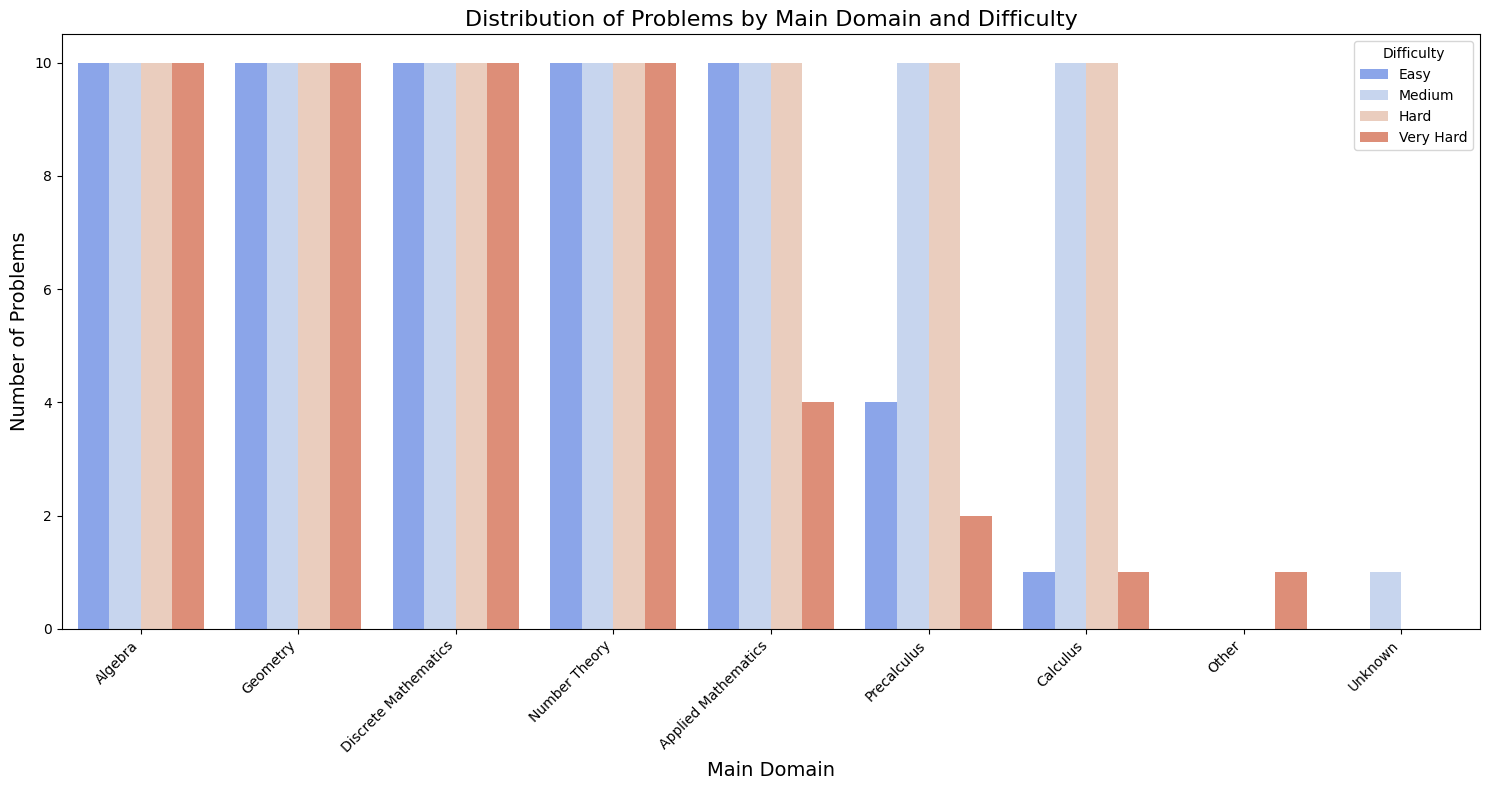

  main_domain subsub_domain difficulty_bin  \
0     Algebra    Prealgebra           Easy   
1     Algebra    Prealgebra           Easy   
2     Algebra    Prealgebra           Easy   
3     Algebra    Prealgebra           Easy   
4     Algebra    Prealgebra           Easy   

                                             problem  
0  If $\frac{1}{9}+\frac{1}{18}=\frac{1}{\square}...  
1  If \( n = 7 \), which of the following express...  
2  If $2n + 5 = 16$, what is the value of the exp...  
3  A set consists of five different odd positive ...  
4  Solve for $x$ in the equation $(-1)(2)(x)(4)=24$.  


In [ ]:
## visualizing subset

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.countplot(
    data=subset,
    x='main_domain',
    hue='difficulty_bin',
    order=subset['main_domain'].value_counts().index,
    palette="coolwarm"
)

plt.title('Distribution of Problems by Main Domain and Difficulty', fontsize=16)
plt.xlabel('Main Domain', fontsize=14)
plt.ylabel('Number of Problems', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Difficulty')
plt.tight_layout()
plt.show()

print(subset[['main_domain', 'subsub_domain', 'difficulty_bin', 'problem']].head())

## LaTeX Cleaning Code: Not Used In Final

In [ ]:
import re

def latex_cleaning(text):

    # math delimiters
    text = re.sub(r'\$([^\$]*)\$', r'\1', text)
    text = re.sub(r'\\\((.*?)\\\)', r'\1', text)

    # fractions
    text = re.sub(r'\\frac\{(.*?)\}\{(.*?)\}', r'(\1/\2)', text)

    # square roots
    text = re.sub(r'\\sqrt\{(.*?)\}', r'sqrt(\1)', text)

    # exponents
    text = re.sub(r'\^{(\d+)}', r'^\1', text)

    # subscripts
    text = re.sub(r'_{(\w+)}', r'_\1', text)

    # symbols
    symbol_map = {
        r'\\times': '*',
        r'\\cdot': '*',
        r'\\geq': '>=',
        r'\\leq': '<=',
        r'\\neq': '!=',
        r'\\infty': 'infinity',
        r'\\square': 'blank',
        r'\^\\circ': '°',
    }
    for latex_sym, plain_sym in symbol_map.items():
        text = re.sub(latex_sym, plain_sym, text)

    text = re.sub(r'\\text\{(.*?)\}', r'\1', text)

    # spacing
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()

    return text


In [ ]:
subset['problem_clean'] = subset['problem'].apply(latex_cleaning)
subset['solution_clean'] = subset['solution'].apply(latex_cleaning)
subset['answer_clean'] = subset['answer'].apply(latex_cleaning)

print(subset[['problem', 'solution', 'answer']].head())
print(subset[['problem_clean', 'solution_clean', 'answer_clean']].head())

                                             problem  \
0  If $\frac{1}{9}+\frac{1}{18}=\frac{1}{\square}...   
1  If \( n = 7 \), which of the following express...   
2  If $2n + 5 = 16$, what is the value of the exp...   
3  A set consists of five different odd positive ...   
4  Solve for $x$ in the equation $(-1)(2)(x)(4)=24$.   

                                            solution answer  
0  We simplify the left side and express it as a ...      6  
1  When \( n=7 \), we have \( 9n=63, n+8=15, n^2=...     8n  
2  Since $2n + 5 = 16$, then $2n - 3 = (2n + 5) -...      8  
3  Solution 1: Let $N=AB0AB$ and let $t$ be the t...     24  
4  Since $(-1)(2)(x)(4)=24$, then $-8x=24$ or $x=...     -3  
                                       problem_clean  \
0  If (1/9)+(1/18)=(1/blank), what is the number ...   
1  If n = 7 , which of the following expressions ...   
2  If 2n + 5 = 16, what is the value of the expre...   
3  A set consists of five different odd positive ...   
4      Solv

In [ ]:
subset.to_csv('subset.csv', index=False)

## Results from GPT 4o mini and Gemini

In [ ]:
!pip install google-generativeai

In [ ]:
import openai
from openai import OpenAI
import google.generativeai as genai
import pandas as pd
import concurrent.futures
import time

input_csv = "subset.csv"
output_csv = "output.csv"
batch_size = 2 # tiny batch for now because of token issues
question_column_name = "problem"

# API clients -- used ChatGPT to figure out syntax of connecting to API
client = OpenAI(api_key="GPT_API_KEY")
genai.configure(api_key="GEMINI_API_KEY")

def prompting(problems):
    prompt = (
        "I have a few math questions. For each one, please give a detailed explanation first, "
        "and then clearly write 'Final Answer: <your answer>' on its own line.\n\n"
    )
    for i, problem in enumerate(problems, 1):
        prompt += f"{i}. {problem}\n"
    return prompt

# get responses
def get_gpt_batch_solution(problems):
    prompt = prompting(problems)
    try:
        response = client.chat.completions.create(
            model="gpt-4o-mini-2024-07-18",
            messages=[{"role": "user", "content": prompt}],
            max_tokens=3000,  # high for detailed responses
            temperature=0.0, # 0.0 for accuracy
        )
        return response.choices[0].message.content.strip()
    except Exception as e:
        print(f"Error: {e}")
        return ""

def get_gemini_batch_solution(problems):
    prompt = prompting(problems)
    try:
        model = genai.GenerativeModel("gemini-pro")
        response = model.generate_content(prompt)
        return response.text.strip()
    except Exception as e:
        print(f"Error: {e}")
        return ""

# split the batch output into solution and answer
def parse_batch_output(batch_output, batch_size):
    results = []
    parts = batch_output.split("\n")
    current_explanation = ""
    current_answer = ""

    for line in parts:
        line = line.strip()

        # skip the yapping
        if line and "Let's solve each of the math questions" not in line:
            if "Final Answer:" in line:
                current_answer = line.split("Final Answer:")[1].strip()
                results.append((current_explanation.strip(), current_answer))
                current_explanation = ""
                current_answer = ""
            else:
                current_explanation += line + " "

    # add on any remaining explanation and answer just in case
    if current_explanation.strip() and current_answer.strip():
        results.append((current_explanation.strip(), current_answer.strip()))

    return results

def process_batch_in_parallel(batch_questions, i):
    gpt_output = get_gpt_batch_solution(batch_questions)
    gemini_output = get_gemini_batch_solution(batch_questions)

    gpt_results = parse_batch_output(gpt_output, len(batch_questions)) if gpt_output else []
    gemini_results = parse_batch_output(gemini_output, len(batch_questions)) if gemini_output else []

    return i, gpt_results, gemini_results

newdf = pd.read_csv(input_csv)
newdf['gptModelSolution'] = ""
newdf['gptModelAnswer'] = ""

questions = newdf[question_column_name].tolist()

# using ChatGPT to try parallel processing for quicker output (did not make much of a difference in timing)
with concurrent.futures.ThreadPoolExecutor() as executor:
    futures = []
    for i in range(0, len(questions), batch_size):
        batch_questions = questions[i:i+batch_size]
        print(f"Processing batch {i // batch_size + 1}...")
        futures.append(executor.submit(process_batch_in_parallel, batch_questions, i))

    # getting results
    for future in concurrent.futures.as_completed(futures):
        i, gpt_batch_results, gemini_batch_results = future.result()
        for j, (gpt_result, gemini_result) in enumerate(zip(gpt_batch_results, gemini_batch_results)):
            row = i + j
            if row < len(newdf):
                 print(f"Updating row {row}...")
                 gpt_solution, gpt_answer = gpt_result
                 gemini_solution, gemini_answer = gemini_result
                 newdf.at[row, 'gptModelSolution'] = gpt_solution
                 newdf.at[row, 'gptModelAnswer'] = gpt_answer
                 newdf.at[row, 'geminiSolution'] = gemini_solution
                 newdf.at[row, 'geminiAnswer'] = gemini_answer

newdf.to_csv(output_csv, index=False)
print(f"All done! Output written to {output_csv}")

Processing batch 1...
Processing batch 2...
Processing batch 3...
Processing batch 4...
Processing batch 5...
Processing batch 6...
Processing batch 7...
Processing batch 8...
Processing batch 9...
Processing batch 10...
Processing batch 11...
Processing batch 12...
Processing batch 13...
Processing batch 14...
Processing batch 15...
Processing batch 16...
Processing batch 17...
Processing batch 18...
Processing batch 19...
Processing batch 20...
Processing batch 21...
Processing batch 22...
Processing batch 23...
Processing batch 24...
Processing batch 25...
Processing batch 26...
Processing batch 27...
Processing batch 28...
Processing batch 29...
Processing batch 30...
Processing batch 31...
Processing batch 32...
Processing batch 33...
Processing batch 34...
Processing batch 35...
Processing batch 36...
Processing batch 37...
Processing batch 38...
Processing batch 39...
Processing batch 40...
Processing batch 41...
Processing batch 42...
Processing batch 43...
Processing batch 44.

In [ ]:
print(newdf.head())

                                              domain  difficulty  \
0  ['Mathematics -> Algebra -> Prealgebra -> Frac...         1.0   
1  ['Mathematics -> Algebra -> Prealgebra -> Inte...         1.0   
2  ['Mathematics -> Algebra -> Prealgebra -> Simp...         1.0   
3  ['Mathematics -> Algebra -> Prealgebra -> Inte...         2.5   
4  ['Mathematics -> Algebra -> Prealgebra -> Simp...         1.0   

                                             problem  \
0  If $\frac{1}{9}+\frac{1}{18}=\frac{1}{\square}...   
1  If \( n = 7 \), which of the following express...   
2  If $2n + 5 = 16$, what is the value of the exp...   
3  A set consists of five different odd positive ...   
4  Solve for $x$ in the equation $(-1)(2)(x)(4)=24$.   

                                            solution answer  source  \
0  We simplify the left side and express it as a ...      6  pascal   
1  When \( n=7 \), we have \( 9n=63, n+8=15, n^2=...     8n  pascal   
2  Since $2n + 5 = 16$, then $2n - 3 = (2

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: fineGrained).
The token `coe` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
The current active token is: `coe`


In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.metrics.pairwise import cosine_similarity

tokenizer = AutoTokenizer.from_pretrained("tbs17/MathBERT")
model = AutoModel.from_pretrained("tbs17/MathBERT")

# testing out different kinds of solutions
model_solution = """
We need to find the sum of the infinite series: \[ S = 1 + 2\left(\frac{1}{1998}\right) + 3\left(\frac{1}{1998}\right)^{2} + 4\left(\frac{1}{1998}\right)^{3} + \ldots \] This series can be expressed in a more general form: \[ S = \sum_{n=1}^{\infty} n \left(\frac{1}{1998}\right)^{n-1} \] This is a power series where \(x = \frac{1}{1998}\). The formula for the sum of the series \( \sum_{n=1}^{\infty} n x^{n-1} \) is given by: \[ \frac{1}{(1-x)^2} \] for \(|x| < 1\). Here, since \(x = \frac{1}{1998}\), we have: \[ S = \frac{1}{\left(1 - \frac{1}{1998}\right)^2} = \frac{1}{\left(\frac{1997}{1998}\right)^2} = \frac{1998^2}{1997^2} \] Calculating this gives: \[ S = \frac{1998^2}{1997^2} = \left(\frac{1998}{1997}\right)^2 \] Thus, the sum of the infinite series is:"""

reference_solution = """
We can rewrite the sum as \(\left(1+\frac{1}{1998}+\left(\frac{1}{1998}\right)^{2}+\ldots\right)+\left(\frac{1}{1998}+\left(\frac{1}{1998}\right)^{2}+\left(\frac{1}{1998}\right)^{3}+\ldots\right)+\left(\left(\frac{1}{1998}\right)^{2}+\left(\frac{1}{1998}\right)^{3}+\ldots\right)+\ldots\) Evaluating each of the infinite sums gives \(\frac{1}{1-\frac{1}{1998}}+\frac{\frac{1}{1998}}{1-\frac{1}{1998}}+\frac{\left(\frac{1}{1998}\right)^{2}}{1-\frac{1}{1998}}+\ldots=\frac{1998}{1997} \cdot\left(1+\frac{1}{1998}+\left(\frac{1}{1998}\right)^{2}+\ldots\right)=\frac{1998}{1997} \cdot\left(1+\frac{1}{1998}+\left(\frac{1}{1998}\right)^{2}+\ldots\right)\), which is equal to \(\left(\frac{1998}{1997}\right)^{2}\), or \(\frac{3992004}{3988009}\), as desired."""

model_solution2 = """
We note that $\left(a \otimes b^{k}\right)=(a \otimes b)^{k}$ for all positive integers $k$. Then for all rational numbers $\frac{p}{q}$ we have $a \otimes b^{\frac{p}{q}}=\left(a \otimes b^{\frac{1}{q}}\right)^{p}=(a \otimes b)^{\frac{p}{q}}$. So by continuity, for all real numbers $a, b$, it follows that $2^{a} \otimes 2^{b}=(2 \otimes 2)^{a b}=4^{a b}$. Therefore given positive reals $x, y$, we have $x \otimes y=2^{\log _{2}(x)} \otimes 2^{\log _{2}(y)}=$ $4^{\log _{2}(x) \log _{2}(y)}$. If $x=4^{\log _{2}(x) \log _{2}(y)}=2^{2 \log _{2}(x) \log _{2}(y)}$ then $\log _{2}(x)=2 \log _{2}(x) \log _{2}(y)$ and $1=2 \log _{2}(y)=\log _{2}\left(y^{2}\right)$. Thus $y=\sqrt{2}$ regardless of $x$."""

reference_solution2 = """
We are given a binary operation \( \otimes \) with the following properties: 1. \( \otimes \) is continuous. 2. \( \otimes \) is commutative. 3. \( \otimes \) is distributive across multiplication. 4. \( 2 \otimes 2 = 4 \). We need to solve the equation \( x \otimes y = x \) for \( y \) in terms of \( x \) for \( x > 1 \). From the property \( 2 \otimes 2 = 4 \), we can infer that \( \otimes \) behaves similarly to multiplication. Let's assume \( a \otimes b = k \cdot (a \cdot b) \) for some constant \( k \). Given \( 2 \otimes 2 = k \cdot (2 \cdot 2) = 4 \), we find \( k = 1 \). Thus, we can assume: \[ x \otimes y = x \cdot y \] Now, substituting this into our equation: \[ x \cdot y = x \] Dividing both sides by \( x \) (valid since \( x > 1 \)) gives: \[ y = 1 \] Thus, the solution to the equation \( x \otimes y = x \) for \( y \) in terms of \( x \) is"""

# used ChatGPT to fix syntax for getting embeddings
def get_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    cls_embedding = outputs.last_hidden_state[:, 0, :].numpy()
    return cls_embedding

embedding_model = get_embedding(model_solution)
embedding_ref = get_embedding(reference_solution)

embedding_model2 = get_embedding(model_solution2)
embedding_ref2 = get_embedding(reference_solution2)

# compare cosine similarity
similarity = cosine_similarity(embedding_model, embedding_ref)
print(f"Cosine Similarity: {similarity[0][0]:.4f}") # correct solution

similarity = cosine_similarity(embedding_model2, embedding_ref2)
print(f"Cosine Similarity: {similarity[0][0]:.4f}") # incorrect solution


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Cosine Similarity: 0.4649
Cosine Similarity: 0.4710
